IMPORTATION DES BIBLIOTHEQUES ET DES DONNEES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Pour pouvoir charger les données il faut les séparer en deux tableaux (1 avec string / 1 avec réel)
attributs = np.loadtxt("forestfires_attributs.csv", delimiter=",", dtype=str)
#On a remplacé les dates (mois et jour, variable qualitative) en variables quantitatives
data = np.loadtxt("forestfires_data.csv", delimiter=",")


DESCRIPTION DES DONNEES

Attributs information from forestfires_names

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 1 to 12
   4. day - day of the week: 1 to 7
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

FWI : Fire Weather Index

Description des données

In [ ]:
#tableau des 20 premières lignes de nos data
description = data[0:20,:] 
from tabulate import tabulate
tableau_descri = tabulate(description,headers = attributs)
print(tableau_descri)

  X    Y    month    day    FFMC    DMC     DC    ISI    temp    RH    wind    rain    area
---  ---  -------  -----  ------  -----  -----  -----  ------  ----  ------  ------  ------
  7    5        3      5    86.2   26.2   94.3    5.1     8.2    51     6.7     0         0
  7    4       10      2    90.6   35.4  669.1    6.7    18      33     0.9     0         0
  7    4       10      6    90.6   43.7  686.9    6.7    14.6    33     1.3     0         0
  8    6        3      5    91.7   33.3   77.5    9       8.3    97     4       0.2       0
  8    6        3      7    89.3   51.3  102.2    9.6    11.4    99     1.8     0         0
  8    6        8      7    92.3   85.3  488     14.7    22.2    29     5.4     0         0
  8    6        8      1    92.3   88.9  495.6    8.5    24.1    27     3.1     0         0
  8    6        8      1    91.5  145.4  608.2   10.7     8      86     2.2     0         0
  8    6        7      2    91    129.5  692.6    7      13.1    63     5.4     

Boxplots

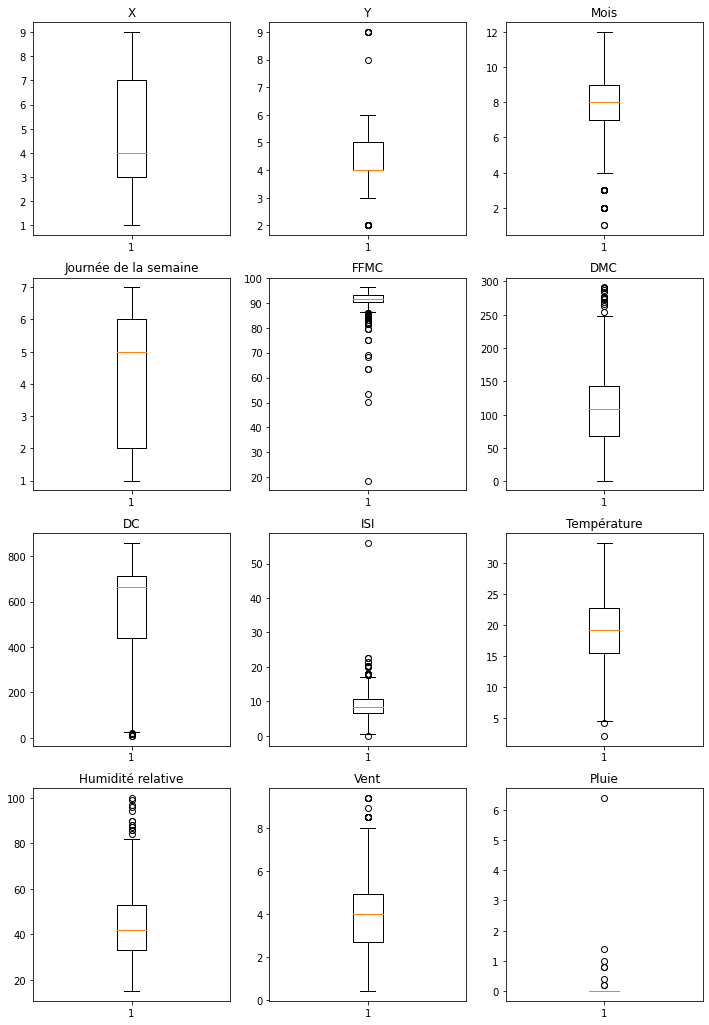

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(12, 18))
axs[0, 0].set_title("X")
axs[0, 0].boxplot(data[:,0])
axs[0, 1].set_title("Y")
axs[0, 1].boxplot(data[:,1])
axs[0, 2].set_title("Mois")
axs[0, 2].boxplot(data[:,2])
axs[1, 0].set_title("Journée de la semaine")
axs[1, 0].boxplot(data[:,3])
axs[1, 1].set_title("FFMC")
axs[1, 1].boxplot(data[:,4])
axs[1, 2].set_title("DMC")
axs[1, 2].boxplot(data[:,5])
axs[2, 0].set_title("DC")
axs[2, 0].boxplot(data[:,6])
axs[2, 1].set_title("ISI")
axs[2, 1].boxplot(data[:,7])
axs[2, 2].set_title("Température")
axs[2, 2].boxplot(data[:,8])
axs[3, 0].set_title("Humidité relative")
axs[3, 0].boxplot(data[:,9])
axs[3, 1].set_title("Vent")
axs[3, 1].boxplot(data[:,10])
axs[3, 2].set_title("Pluie")
axs[3, 2].boxplot(data[:,11]);


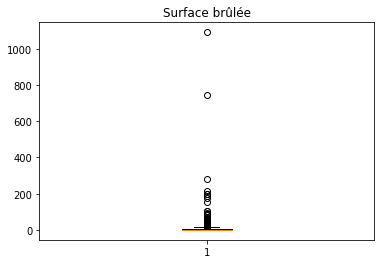

In [ ]:
plt.title("Surface brûlée")
plt.boxplot(data[:,12])
plt.show()


ACP

                         X         Y     month       day      FFMC       DMC        DC       ISI     temp       RH     wind     rain     area
---------------  ---------  --------  --------  --------  --------  --------  --------  --------  -------  -------  -------  -------  -------
Valeurs propres  0.0791783  0.212075  0.435427  0.461088  0.523217  0.756939  0.926435  0.984627  1.06437  1.23443  1.43763  1.56939  3.31519


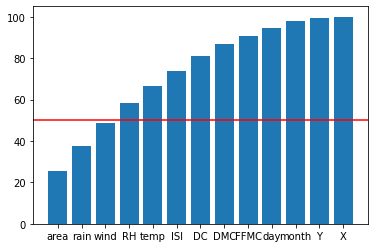

In [ ]:
n, p = data.shape
data_norm = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
cor = 1/n * data_norm.T@data_norm
valeurP, vecteurP = np.linalg.eigh(cor) # valeurs propres / vecteurs propres

tableau_valeursP = tabulate([['Valeurs propres',0.07917828, 0.21207523, 0.43542691, 0.46108827, 0.52321664, 0.75693863, 0.92643543, 0.98462651, 1.06437123 ,1.23443211 ,1.43762628, 1.56939313,
 3.31519135]],attributs) 
print(tableau_valeursP)

#Ordre à modifier pour avoir les variances dans l'ordre décroissant
indexes_sorted = np.argsort(valeurP[::-1])
valeurP = valeurP[indexes_sorted]
vecteurP = vecteurP[:,indexes_sorted]
attributsSorted = attributs[indexes_sorted]

#Projection + reconstruction
P = vecteurP[:,:4]
Xproj = data_norm@P 
Xrec = ((Xproj@P.T)*np.std(data, axis=0))+np.mean(data, axis=0)

#pourcentage cumulé de variance expliquée en prenant les  p  premiers axes
varExplique = np.cumsum(valeurP)*100 / np.sum(valeurP)
x_pos = np.arange(len(varExplique))
plt.bar(x_pos, varExplique)
plt.xticks(x_pos, attributsSorted)
plt.axhline(y=50, color='red');
#Avec les 3 premiers axes ont décrit presque 50% de la varaince expliquée

In [ ]:
#matrice de corrélation
cor = 1/n * data_norm.T@data_norm
cor = np.around(cor, decimals=3)
attributs = attributs.reshape((1,13))
cor = np.concatenate((attributs.T,cor),axis=1)
empty = np.array([''])
empty = np.reshape(empty, (1,1))
attributs = np.concatenate((empty, attributs), axis=1)
attributs = np.reshape(attributs,(14))
tableau_correlation = tabulate(cor, headers = attributs)
print(tableau_correlation)

            X       Y    month     day    FFMC     DMC      DC     ISI    temp      RH    wind    rain    area
-----  ------  ------  -------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------
X       1       0.54    -0.071  -0.028  -0.021  -0.048  -0.086   0.006  -0.051   0.085   0.019   0.065   0.063
Y       0.54    1       -0.07   -0.007  -0.046   0.008  -0.101  -0.024  -0.024   0.062  -0.02    0.033   0.045
month  -0.071  -0.07     1      -0.054   0.289   0.469   0.866   0.183   0.37   -0.096  -0.091   0.014   0.058
day    -0.028  -0.007   -0.054   1      -0.038   0.065  -0       0.038   0.051   0.093   0.032  -0.049   0.023
FFMC   -0.021  -0.046    0.289  -0.038   1       0.383   0.331   0.532   0.432  -0.301  -0.028   0.057   0.04
DMC    -0.048   0.008    0.469   0.065   0.383   1       0.682   0.305   0.47    0.074  -0.105   0.075   0.073
DC     -0.086  -0.101    0.866  -0       0.331   0.682   1       0.229   0.496  -0.039  -0.203   0.036   0.049
IS

REGRESSION

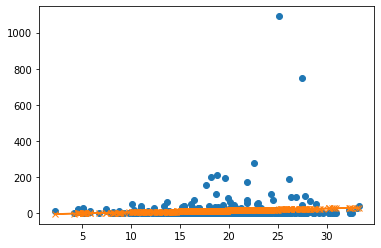

In [ ]:
x = data[:,8] # données pour la régression ici la température
y = data[:,12] # surface de forêt brûlé
n = len(y)
p = 2
X = np.stack([np.ones((n,)), x], axis=-1)
al = np.linalg.solve(X.T@X,X.T@y)
plt.plot(x,y,'o')
z = X@al
plt.plot(x,z,'x-')
plt.show()

Définition de la fonction

In [ ]:
#fonction de régression
def ma_reg(X,y):
    '''
    X : numpy array de dimention n x p
    y : numpy array de dimention n
    '''
    n,p = X.shape
    m = np.prod(y.shape)
    if n != m:
        raise Exception('X doit etre une matrice de n lignes et p colonnes et y un vecteur de n lignes')
    a = np.linalg.solve(X.T@X,X.T@y)
    z = X@a
    e = y - z # z - y
    s2 = e.T@e/(n-p)
    SCT = np.sum((y-np.mean(y))**2)
    SCE = np.sum(e**2)
    R2 = 1 - SCE/SCT
    H = X@np.linalg.solve(X.T@X,X.T)  # plus stable et plus rapide
    h = np.diag(H)
    c = h/((1-h)**2)*(e**2)/(p*s2)
    
    dv = np.stack([e, h, c])
    
    return a, s2, R2, dv


Régression multiple


In [ ]:
#Régression multiple

X = data[:,:12]
X = np.concatenate((X,np.ones((n,1))), axis=1)
y = data[:,12]

a, s2, R2, diagd = ma_reg(X,y)

print(R2)
print(np.mean(diagd.T, axis=0))

0.02428524549642952
[-7.47650383e-15  2.51450677e-02  1.42122292e-03]


# REGRESSIONS SIMPLES


In [ ]:
res = np.zeros((12,7)) 
y = data[:,12]
for i in range(12):
    X = data[:,i:i+1]
    X = np.concatenate((X,np.ones((n,1))), axis=1)
    a, s2, R2, diagd = ma_reg(X,y)
    diagd = np.mean(diagd, axis=1)
    res[i,0] = a[0]
    res[i,1] = a[1]
    res[i,2] = s2
    res[i,3] = R2
    res[i,4] = diagd[0]
    res[i,5] = diagd[1]
    res[i,6] = diagd[2]

attributs = np.array(["X","Y","Mois","Journée","FFMC","DMC","DC","ISI","Température","Humidité","Vent","Pluie"])
attributs = attributs.reshape((1,12))
res = np.concatenate((attributs.T,res),axis=1)
empty = np.array([''])
empty = np.reshape(empty, (1,1))
attributs = np.concatenate((empty, attributs), axis=1)
attributs = np.reshape(attributs,(13))
tableau_regression_area = tabulate(res,headers=('a','b','Covariance','Coef R2','Résidus','H','Contribution' ))
print(tableau_regression_area)

                      a           b    Covariance      Coef R2       Résidus           H    Contribution
-----------  ----------  ----------  ------------  -----------  ------------  ----------  --------------
X             1.74383      4.70491        4043.62  0.0040177     3.51835e-15  0.00386847      0.00193111
Y             2.3225       2.861          4051.76  0.00201361    1.53928e-15  0.00386847      0.00201664
Mois          1.62838      0.702138       4046.21  0.00337893    3.07856e-15  0.00386847      0.001295
Journée       0.711785     9.81429        4057.76  0.000533991   2.85866e-15  0.00386847      0.0015881
FFMC          0.462672   -29.0914         4053.4   0.00160978    3.08956e-14  0.00386847      0.00127624
DMC           0.0725491    4.80361        4038.3   0.00532817   -8.79589e-16  0.00386847      0.00188318
DC            0.0126721    5.90372        4050.03  0.0024387     4.83774e-15  0.00386847      0.00127549
ISI           0.115287    11.8072         4059.65  6.81894

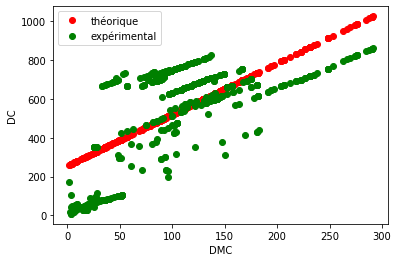

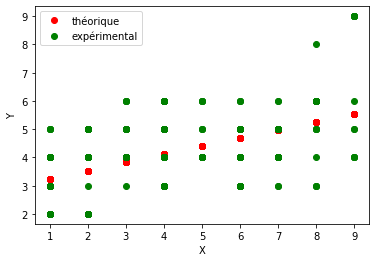

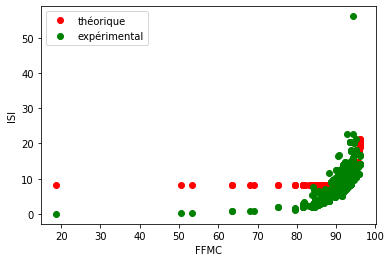

0.19057061430146838


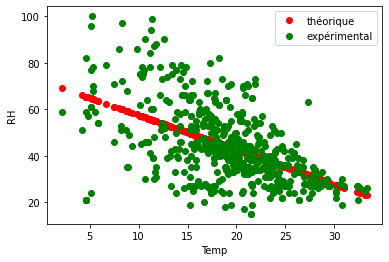

          a          b    Covariance    Coef R2       Résidus           H    Contribution
-----------  ---------  ------------  ---------  ------------  ----------  --------------
 2.64228     254.984     32962.4       0.465385   3.30725e-13  0.00386847      0.00209372
 0.2868        2.96067       1.07438   0.291112  -1.44308e-16  0.00386847      0.00234002
 2.1841e-41    8.22392      16.8598    0.190571  -3.76574e-15  0.00386847      0.00264255
-1.48204      72.2828      192.575     0.278141   9.67548e-15  0.00386847      0.00242215


In [ ]:
res = np.zeros((4,7)) 
#1 DC/DMC
y = data[:,6]
x = data[:,5:6]
X = np.concatenate((x,np.ones((n,1))), axis=1)
a, s2, R2, diagd = ma_reg(X,y)
diagd = np.mean(diagd, axis=1)
res[0,0] = a[0]
res[0,1] = a[1]
res[0,2] = s2
res[0,3] = R2
res[0,4] = diagd[0]
res[0,5] = diagd[1]
res[0,6] = diagd[2]
plt.plot(x, a[0]*x + a[1] , "bo", color='red', label='théorique')
plt.plot(x, y, "bo", color='g', label='expérimental')
plt.xlabel('DMC')
plt.ylabel('DC')
plt.legend()
plt.show()

#2 Y/X
y = data[:,1]
x = data[:,0:1]
X = np.concatenate((x,np.ones((n,1))), axis=1)
a, s2, R2, diagd = ma_reg(X,y)
diagd = np.mean(diagd, axis=1)
res[1,0] = a[0]
res[1,1] = a[1]
res[1,2] = s2
res[1,3] = R2
res[1,4] = diagd[0]
res[1,5] = diagd[1]
res[1,6] = diagd[2]
plt.plot(x, a[0]*x + a[1], "bo", color='red', label='théorique')
plt.plot(x, y, "bo", color='g', label='expérimental')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#3 ISI/FFMC
y = data[:,7]
x = data[:,4:5]
x_exp = np.exp(x)
X = np.concatenate((x_exp,np.ones((n,1))), axis=1)
a, s2, R2, diagd = ma_reg(X,y)
diagd = np.mean(diagd, axis=1)
res[2,0] = a[0]
res[2,1] = a[1]
res[2,2] = s2
res[2,3] = R2
res[2,4] = diagd[0]
res[2,5] = diagd[1]
res[2,6] = diagd[2]
plt.plot(x, X@a , "bo",color='red', label='théorique')
plt.plot(x, y, "o", color='g', label='expérimental')
plt.xlabel('FFMC')
plt.ylabel('ISI')
plt.legend()
plt.show()
print(R2)

#4 RH/Temp
y = data[:,9]
x = data[:,8:9]
X = np.concatenate((x,np.ones((n,1))), axis=1)
a, s2, R2, diagd = ma_reg(X,y)
diagd = np.mean(diagd, axis=1)
res[3,0] = a[0]
res[3,1] = a[1]
res[3,2] = s2
res[3,3] = R2
res[3,4] = diagd[0]
res[3,5] = diagd[1]
res[3,6] = diagd[2]
plt.plot(x, a[0]*x + a[1] , "bo", color='red', label='théorique')
plt.plot(x, y, "o", color='g', label='expérimental')
plt.xlabel('Temp')
plt.ylabel('RH')
plt.legend()
plt.show()

tableau_regression = tabulate(res,headers=('a','b','Covariance','Coef R2','Résidus','H','Contribution' ))
print(tableau_regression)

# TESTS STATISTIQUES


TEST(S) STATISTIQUE(S)

In [ ]:
#H0 : surface brûlée indépendante de la température
#H1 : surface brûlée dépendante de la température
from scipy.stats import ttest_ind
x = data[:,12] # on charge les donnéees de la surface brûlée
y = data[:,8] # on charge les données de la température
ttest_ind(x,y) # test de Student pour données Quantitatif VS Quantitatif

Ttest_indResult(statistic=-2.1492136924048335, pvalue=0.03184946709710879)

In [ ]:
#H0 : surface brûlée indépendante de l'humidité
#H1 : surface brûlée dépendante de l'humidité
from scipy.stats import ttest_ind
x = data[:,12] # on charge les donnéees de la surface brûlée
y = data[:,9] # on charge les données de l'humidité
ttest_ind(x,y) # test de Student pour données Quantitatif VS Quantitatif

Ttest_indResult(statistic=-10.878845358296164, pvalue=3.596044049353644e-26)

In [ ]:
#H0 : surface brûlée indépendante du mois
#H1 : surface brûlée dépendante du mois
from scipy.stats import ttest_ind
x = data[:,12] # on charge les donnéees de la surface brûlée
y = data[:,2] # on charge les données du mois
ttest_ind(x,y) # test de Student pour données Quantitatif VS Quantitatif

Ttest_indResult(statistic=1.9236630230674712, pvalue=0.05467165770518388)